## <font color='blue'>SME0104 - Cálculo Numérico</font>

### Primeiro Trabalho em Grupo 
#### Comparação de Métodos na Solução do Laplaciano em Grafos para propagação de informação

**Luis Gustavo Nonato**

------

Considere os arquivos `manh.el` e `manh.xy` que fornecem as arestas e as coordenadas dos vértices do grafo de ruas da ilha de Manhattan, NY (arquivos disponíveis para download no Google Drive).

O grafo de ruas possui diversas componentes conexas, considerando somente a maior componente conexa, você deve realizar as seguintes tarefas:
1. Selecione alguns vértices do grafo $v_{i_1},v_{i_2},\ldots,v_{i_k},\, k<<n$ ($n$ é o número de vértices na maior componente do grafo e $k$ é um número bem menor que $n$, $k=10$ por exemplo) e atribua valores distindos $c_{i_1},c_{i_2},\ldots,c_{i_k}$ a cada um dos vértices selecionados (por exemplo valores no intervalo (0,10]);

---


2. Construa a matriz Laplaciana $L$ do grafo de ruas;
3. Construa a matriz de penalidades $P$, sendo $P$ é uma matriz diagonal onde a entrada $P_{jj}=\alpha$ se $j$ corresponde ao índice de algum dos vértices escolhidos no item 1 acima ($\alpha=1.0e7$ por exemplo), sendo $P_{ii}=0$ caso contrário.
4. Construa um vetor $b$ da seguinte forma:
$$
b_{j} = \left\{\begin{matrix} c_{i_s} & \:{ se } \: j = i_s \\ 0 & \:{ caso \: contrário}\end{matrix}\right.
$$
5. Compare o tempo de solução do sistema
$$
(L+P)x = Pb
$$
para os métodos:
    - Decomposição LU
    - Cholesky
    - Jacobi e Gaus-Seidel
    - Gradientes Conjugados
    
6. Refaça as tarefas com representação por matriz esparsa e matrizes cheias, comparando os resultados.

Alunos: 
- Kauê Hunnicutt Bazilli - 11212226
- Matheus Vieira Gonçalves - 11200397
- Pedro Henrique dias Junqueira de Souza - 11294312

In [1]:
import sys
import time
%pip install --prefix {sys.prefix} numpy
%pip install --prefix {sys.prefix} scipy
%pip install --prefix {sys.prefix} networkx
%pip install --prefix {sys.prefix} matplotlib

import numpy as np
import scipy as sci
from scipy.sparse import linalg
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Construção do grafo em memória com base nos arquivos
G = nx.Graph()

#Nós
with open("./manh.xy","r") as file:
    lines = file.readlines()
    for i, line in enumerate(lines):
        [x, y] = map(float, line.split("\t")) #Lê como floats
        G.add_node(i, data=(x, y))

#Arestas
with open("./manh.el","r") as file:
    lines = file.readlines()
    for line in lines:
        [x, y] = map(int, line.split("\t")) #Lê como ints
        G.add_edge(x,y)
        
# Obtendo maior componente conexa
Graphs = nx.connected_components(G)
cont = 0
for i in Graphs:
    cont += 1
    if (cont == 2):
        G = G.subgraph(i).copy()
        print(i)
        break

#LCC_generator = min(nx.connected_components(G), key=len)
#G = G.subgraph(LCC_generator).copy()

# Desse ponto em diante, G é a maior componente conexa

{3598, 3599, 532, 24, 1048, 540, 544, 4646, 1576, 4651, 5163, 1581, 3634, 3124, 5689, 63, 575, 3137, 70, 8264, 584, 6219, 6743, 4187, 2660, 6770, 116, 1656, 2170, 7806, 8833, 131, 4743, 2701, 8334, 145, 6290, 3221, 2710, 160, 1702, 4777, 691, 7862, 700, 6845, 189, 1727, 3270, 4296, 6858, 4300, 8397, 1750, 3291, 737, 1252, 3812, 5351, 8425, 3311, 753, 1781, 4854, 5881, 8451, 266, 6923, 6411, 6412, 4366, 6931, 789, 3869, 5920, 1827, 1315, 4397, 7983, 1338, 8509, 4927, 4930, 8515, 1351, 5448, 6987, 8530, 8020, 856, 4441, 8552, 1384, 3436, 4461, 3954, 5493, 3446, 4982, 382, 7552, 6021, 7565, 3984, 6047, 2465, 2977, 1444, 7084, 2487, 7097, 7612, 8644, 3015, 1991, 8139, 2007, 3561, 6123, 1006, 1010, 2550, 6137}


In [3]:
# 1) Selecione alguns vértices do grafo e atribua valores distintos a cada um dos vértices selecionados

# Uma lista dos índices e outra lista com os seus respectivos valores
c_indexes = np.random.randint(0, len(G), 10)
c_values = np.random.uniform(0, 10, len(c_indexes))

In [4]:
# 2) Construa a matriz Laplaciana L do grafo de ruas

# Obtendo a matriz laplaciana
L = np.array(nx.laplacian_matrix(G).todense())
L.shape

<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


(123, 123)

In [5]:
# 3) Construa a matriz de penalidades P

P_diag =  [1e7 if i in c_indexes else 0 for i in range(len(G))]
P = np.diag(P_diag)

In [6]:
# 4) Construa o vetor b 
# Px = b
# b é um vetor com ci nos índices i escolhidos na 1) e 0 em todo o resto.
b = np.zeros(len(G))
for i,ci in enumerate(c_indexes):
    b[ci] = c_values[i]

In [7]:
# TODO: 5) Compare o tempo de solução do sistema (L + P)x = Px = b para os métodos:
#   - Decomposição LU
#   - Cholesky
#   - Jacobi e Gaus-Seidel
#   - Gradientes Conjugados
# NOTE: Pode usar métodos embutidos do numpy e etc...
#
# Lx = 0
# Px = b
#
# Nem P nem L são invertíveis, mas (L + P) é, então resolvemos a soma dos sistemas:
#
# (L + P)x = Px = b

P_csc_sparse = sci.sparse.csc_matrix(P)
L_csc_sparse = sci.sparse.csc_matrix(L)
b_csc_sparse = sci.sparse.csc_array(b)

L_plus_P_csc_sparse =sci.sparse.csc_matrix(np.add(L, P))
L_plus_P_dense = np.add(L, P)

Pb_dense = np.dot(P, b)
Pb_csc_sparse = sci.sparse.csr_matrix.multiply(P_csc_sparse, b_csc_sparse)

In [8]:
# Decomposição LU

def dense_lu_solver(A,b):
	lu, piv = sci.linalg.lu_factor(A)
	x = sci.linalg.lu_solve((lu,piv),b)
	return x

def sparse_lu_solver(A,b):
	lu = linalg.splu(A)
	x = lu.solve(b)
	return x

#print(dense_lu_solver(L_plus_P_dense, Pb_dense))
#print(sparse_lu_solver(L_plus_P_csc_sparse, Pb_dense))

In [9]:

# Decomposição de cholesky

def dense_cholesky_solver(A,b):
	c, low = sci.linalg.cho_factor(A)
	x = sci.linalg.cho_solve((c,low),b)
	return x

def sparse_cholesky_solver(A,b):
	#TODO
	return False

#print(dense_cholesky_solver(L_plus_P_dense, Pb_dense))
#print(sparse_cholesky_solver(L_plus_P_csc_sparse, Pb_dense))

In [10]:
# gradientes conjugados

def sparse_cg_solver(A,b):
	return linalg.cg(A,b)

def dense_cg_solver(A,b):
	return linalg.cg(A,b)

#print(dense_cg_solver(L_plus_P_dense, Pb_dense))
print(sparse_cg_solver(L_plus_P_csc_sparse, Pb_dense))


(array([0.        , 0.        , 5.82362054, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       4.70017774, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       6.99395482, 0.        , 0.        , 0.        , 5.17172573,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 5.96344859, 0.        , 0.        , 0.        ,
       0.88651624, 0.        , 0.        , 0.        , 0.        ,
       0.        , 2.82334035, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.    

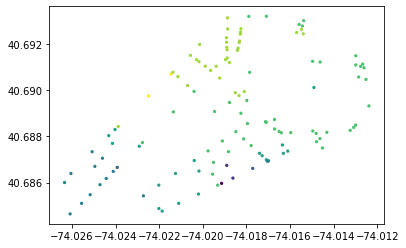

In [25]:
cmap = cm.get_cmap("viridis", 8)

def visualize(solution):
    x = [data["data"][0] for (_,data) in G.nodes.items()]
    y = [data["data"][1] for (_,data) in G.nodes.items()]
    
    # Normaliza a solução entre 0 e 1 e acha as cores
    norm_solution = [(a - min(solution))/max(solution - min(solution)) for a in solution]
    colors = [cmap(a) for a in norm_solution]
    plt.scatter(x, y, color=colors, s=5)
    
x = sparse_lu_solver(L_plus_P_csc_sparse, b)
visualize(x)